In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('D:/EEGDecoder/eeg-feature-generation-master/code/bcitraining_0225test.csv')
data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q2_0,...,freq_669_2,freq_679_2,freq_689_2,freq_699_2,freq_709_2,freq_720_2,freq_730_2,freq_740_2,freq_750_2,Label
0,-425.95591,-349.11405,-190.56099,0.04079,0.16042,0.14002,-426.96273,-353.07364,-194.01717,-425.01583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.57654,-6.02311,20.09822,-0.35285,-0.25332,0.02179,59.28592,0.22953,19.56035,42.44456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,39.91221,-25.62766,14.06950,-0.17742,0.15349,0.02553,44.29152,-29.41617,13.43932,35.82324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,-541.77313,-447.59123,-335.09878,0.21627,0.23167,0.26314,-547.11125,-453.30968,-341.59389,-536.78890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,60.15629,-8.48209,10.15570,0.06547,-0.01167,-0.12317,58.54021,-8.19408,13.19586,61.66523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,-51.12817,-115.96869,-33.82179,-1.10701,-0.83619,0.16775,-23.80367,-95.32884,-37.96231,-76.64117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3113,150.58146,-499.32526,-497.33938,1.24688,0.50130,-0.17129,119.80447,-511.69883,-493.11146,179.31806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3114,-444.36930,-355.05675,-720.40384,-0.01082,0.09150,0.01132,-444.10221,-357.31533,-720.68324,-444.61869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3115,-432.88781,-358.53112,-211.95696,0.03555,-0.04363,0.29959,-433.76539,-357.45414,-219.35181,-432.06841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data['Label'].value_counts()

2.0    1752
0.0    1365
Name: Label, dtype: int64

In [4]:
label_mapping = {'Relaxed': 0, 'Concentrated': 2}

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [7]:
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q2_0,...,freq_659_2,freq_669_2,freq_679_2,freq_689_2,freq_699_2,freq_709_2,freq_720_2,freq_730_2,freq_740_2,freq_750_2
2211,-6.44011,33.89284,27.73884,-0.11265,-0.12895,-0.30887,-3.65965,37.07578,35.36262,-9.03623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1655,20.96401,-30.63726,2.95826,-0.21916,0.06906,-0.04608,26.37352,-32.34196,4.09555,15.91313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2504,-438.55750,-339.65397,-212.64136,-0.08253,-0.04348,0.18994,-436.52047,-338.58069,-217.32961,-440.45948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,-424.40011,-331.31026,-190.21131,0.04338,-0.16436,-0.11180,-425.47093,-327.25343,-187.45178,-423.40027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2287,-103.40636,-498.17150,158.38850,0.19672,0.00130,0.28174,-108.26200,-498.20351,151.43429,-98.87264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,103.27360,80.43590,31.12345,0.18939,0.12342,-0.45876,98.59889,77.38958,42.44712,107.63839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3089,35.70482,-53.11780,4.65618,-0.40765,-0.13543,0.43438,45.76689,-49.77485,-6.06562,26.30984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,-419.25026,-328.30525,-196.52800,0.08736,0.15214,0.39264,-421.40669,-332.06052,-206.21959,-417.23681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1122,18.66397,-39.36058,18.01697,-0.46006,0.15822,-0.06537,30.01964,-43.26601,19.63059,8.06114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_test

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q2_0,...,freq_659_2,freq_669_2,freq_679_2,freq_689_2,freq_699_2,freq_709_2,freq_720_2,freq_730_2,freq_740_2,freq_750_2
2091,-33.71146,-56.12281,-12.61468,1.09135,1.04343,0.14750,-60.64948,-81.87800,-16.25549,-8.55932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,-553.38178,-519.94520,-414.10042,-0.16221,-0.06298,-0.03720,-549.37787,-518.39066,-413.18222,-557.12024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2812,-306.33708,-258.74124,-129.43233,-0.33240,-0.40256,-0.29545,-298.13234,-248.80472,-122.13964,-313.99787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1031,151.23968,-435.23273,27.65469,-0.85529,-0.60786,0.10547,172.35094,-420.22887,25.05148,131.52802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1087,43.80358,24.81798,34.24252,-0.18909,-0.11773,0.35195,48.47090,27.72397,25.55530,39.44568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,49.79303,23.25657,37.89080,-0.18226,-0.13075,-0.44365,54.29172,26.48381,48.84152,45.59258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2989,-432.12487,-336.23384,-211.48760,0.08771,-0.03745,-0.23157,-434.28991,-335.30948,-205.77161,-430.10337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,388.57561,231.53160,38.12267,-0.12377,-0.00334,-0.01825,391.63053,231.61406,38.57316,385.72321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,-398.20772,-304.52696,-184.97732,0.06682,-0.07879,0.24863,-399.85704,-302.58225,-191.11426,-396.66774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y_test

2091    2.0
1810    0.0
2812    2.0
1031    0.0
1087    2.0
       ... 
906     2.0
2989    0.0
937     0.0
350     0.0
1127    0.0
Name: Label, Length: 936, dtype: float64

In [12]:
#orig
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
Model: "functional_1"

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 735)]             0         
_________________________________________________________________
tf.expand_dims_4 (TFOpLambda (None, 735, 1)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 735, 256)          198912    
_________________________________________________________________
flatten_4 (Flatten)          (None, 188160)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 564483    
Total params: 763,395
Trainable params: 763,395
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
55/55 [==============================] - 78s 1s/step - loss: 1.8787 - accuracy: 0.6341 - val_loss: 1.5687 - val_accuracy: 0.6362
Epoch 2/50
55/55 [==============================] - 79s 1s/step - loss: 1.2387 - accuracy: 0.7050 - val_loss: 0.9729 - val_accuracy: 0.7460
Epoch 3/50
55/55 [==============================] - 79s 1s/step - loss: 0.6448 - accuracy: 0.7968 - val_loss: 0.3887 - val_accuracy: 0.8444
Epoch 4/50
55/55 [==============================] - 79s 1s/step - loss: 0.4378 - accuracy: 0.8372 - val_loss: 0.4212 - val_accuracy: 0.8513
Epoch 5/50
55/55 [==============================] - 80s 1s/step - loss: 0.3096 - accuracy: 0.8788 - val_loss: 0.4737 - val_accuracy: 0.8490
Epoch 6/50
55/55 [==============================] - 83s 2s/step - loss: 0.2436 - accuracy: 0.9170 - val_loss: 0.3071 - val_accuracy: 0.8787
Epoch 7/50
55/55 [==============================] - 99s 2s/step - loss: 0.3061 - accuracy: 0.8823 - val_loss: 0.3485 - val_accuracy: 0.8924
Epoch 8/50
55/55 [==

In [14]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 88.889%


In [15]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [16]:
# serialize model to JSON
modelbci0225_json = model.to_json()
with open("modelbci_0225.json", "w") as json_file:
    json_file.write(modelbci0225_json)
# serialize weights to HDF5
model.save_weights("modelbci_0225.h5")
model.save("modelbci_0225")
print("Saved model to disk")

INFO:tensorflow:Assets written to: modelbci_0225\assets


INFO:tensorflow:Assets written to: modelbci_0225\assets


Saved model to disk


In [18]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("modelbci_0225")

# Let's check:
np.testing.assert_allclose(model.predict(X_test), reconstructed_model.predict(X_test))

In [19]:
y_pred = np.array(list(map(lambda x: np.argmax(x), reconstructed_model.predict(X_test))))
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

     Relaxed       0.84      0.92      0.88       406
Concentrated       0.93      0.87      0.90       530

    accuracy                           0.89       936
   macro avg       0.89      0.89      0.89       936
weighted avg       0.89      0.89      0.89       936



Confusion Matrix:
 [[372  34]
 [ 70 460]]


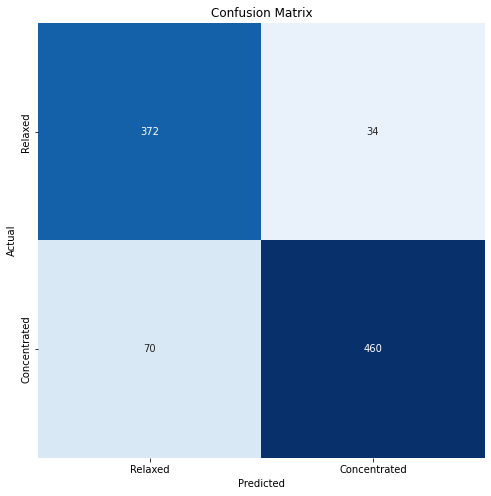

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",(cm))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, label_mapping.keys())
plt.yticks(np.arange(2) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
#TP FP
#FN TN

In [50]:
X_test

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q2_0,...,freq_659_2,freq_669_2,freq_679_2,freq_689_2,freq_699_2,freq_709_2,freq_720_2,freq_730_2,freq_740_2,freq_750_2
2091,-33.71146,-56.12281,-12.61468,1.09135,1.04343,0.14750,-60.64948,-81.87800,-16.25549,-8.55932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,-553.38178,-519.94520,-414.10042,-0.16221,-0.06298,-0.03720,-549.37787,-518.39066,-413.18222,-557.12024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2812,-306.33708,-258.74124,-129.43233,-0.33240,-0.40256,-0.29545,-298.13234,-248.80472,-122.13964,-313.99787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1031,151.23968,-435.23273,27.65469,-0.85529,-0.60786,0.10547,172.35094,-420.22887,25.05148,131.52802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1087,43.80358,24.81798,34.24252,-0.18909,-0.11773,0.35195,48.47090,27.72397,25.55530,39.44568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,49.79303,23.25657,37.89080,-0.18226,-0.13075,-0.44365,54.29172,26.48381,48.84152,45.59258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2989,-432.12487,-336.23384,-211.48760,0.08771,-0.03745,-0.23157,-434.28991,-335.30948,-205.77161,-430.10337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,388.57561,231.53160,38.12267,-0.12377,-0.00334,-0.01825,391.63053,231.61406,38.57316,385.72321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,-398.20772,-304.52696,-184.97732,0.06682,-0.07879,0.24863,-399.85704,-302.58225,-191.11426,-396.66774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_test

2091    2.0
1810    0.0
2812    2.0
1031    0.0
1087    2.0
       ... 
906     2.0
2989    0.0
937     0.0
350     0.0
1127    0.0
Name: Label, Length: 936, dtype: float64

In [49]:
x_pred = np.argmax(reconstructed_model.predict(X_test[:1]))
print(x_pred)
print(y_test[:1])


2
2091    2.0
Name: Label, dtype: float64


In [53]:
x_pred_first5 = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test[:5]))))
print(x_pred_first5)
print(y_test[:5])

[2 0 0 0 2]
2091    2.0
1810    0.0
2812    2.0
1031    0.0
1087    2.0
Name: Label, dtype: float64
